In [1]:
%matplotlib inline
from preamble import *

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

## Supervised Learning
### Classification and Regression

### Generalization, Overfitting, and Underfitting

![model_complexity](images/overfitting_underfitting_cartoon.png)

#### Relation of Model Complexity to Dataset Size

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

X.shape: (26, 2)


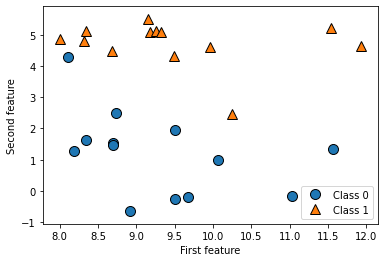

In [2]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)

Text(0, 0.5, 'Target')

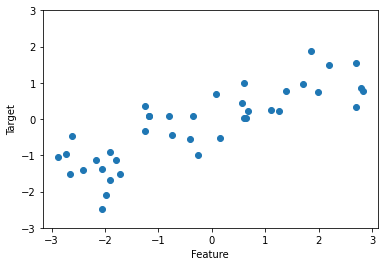

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [6]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [7]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


Again, you can get more information about the dataset by reading the DESCR attribute
of boston. For our purposes here, we will actually expand this dataset by not only
considering these 13 measurements as input features, but also looking at all products
(also called interactions) between features. In other words, we will not only consider
crime rate and highway accessibility as features, but also the product of crime rate
and highway accessibility. Including derived feature like these is called feature engi‐
neering, which we will discuss in more detail in Chapter 4. This derived dataset can be
loaded using the load_extended_boston function:

In [9]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


The resulting 104 features are the 13 original features together with the 91 possible
combinations of two features within those 13

#### k-Nearest Neighbors
##### k-Neighbors classification

In its simplest version, the k-NN algorithm only considers exactly one nearest neigh‐
bor, which is the closest training data point to the point we want to make a prediction
for. The prediction is then simply the known output for this training point.

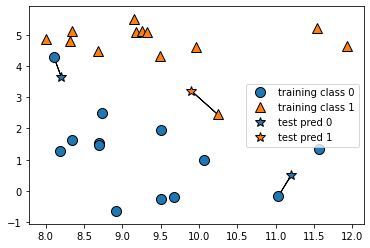

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

Instead of considering only the closest neighbor, we can also consider an arbitrary
number, k, of neighbors. This is where the name of the k-nearest neighbors algorithm
comes from. When considering more than one neighbor, we use voting to assign a
label. This means that for each test point, we count how many neighbors belong to
class 0 and how many neighbors belong to class 1. We then assign the class that is
more frequent: in other words, the majority class among the k-nearest neighbors.

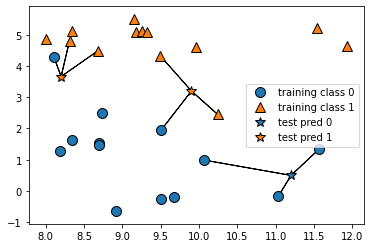

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [16]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### Analyzing KNeighborsClassifier

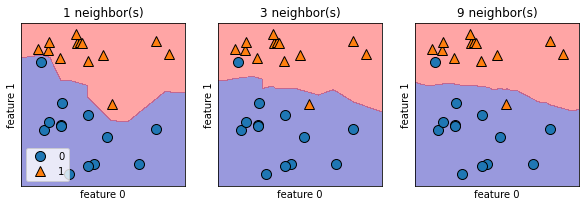

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

Considering more and more neigh‐
bors leads to a smoother decision boundary. A smoother boundary corresponds to a
simpler model. In other words, using few neighbors corresponds to high model com‐
plexity (as shown on the right side of Figure 2-1), and using many neighbors corre‐
sponds to low model complexity (as shown on the left side of Figure 2-1).

If you
consider the extreme case where the number of neighbors is the number of all data
points in the training set, each test point would have exactly the same neighbors (all
training points) and all predictions would be the same: the class that is most frequent
in the training set.

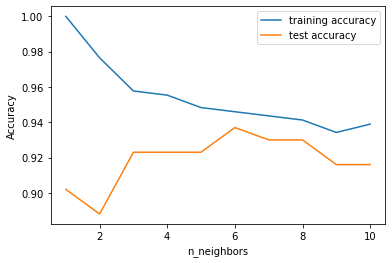

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

The
test set accuracy for using a single neighbor is lower than when using more neigh‐
bors, indicating that using the single nearest neighbor leads to a model that is too
complex

 On the other hand, when considering 10 neighbors, the model is too simple
and performance is even worse. The best performance is somewhere in the middle,
using around six neighbors.

##### k-neighbors regression

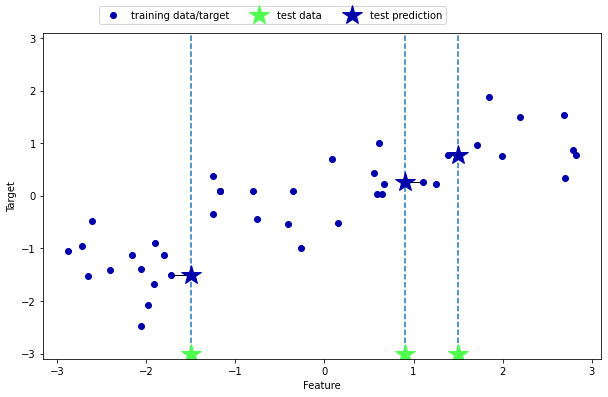

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

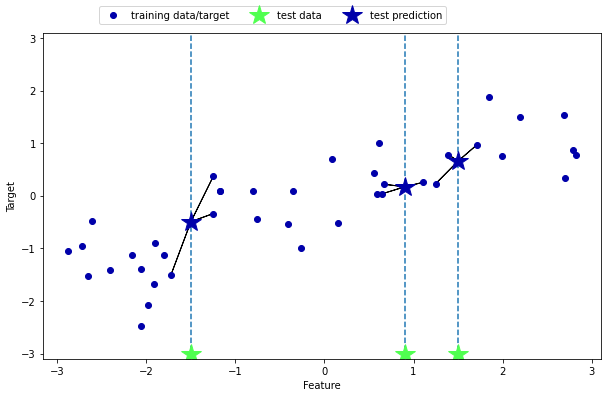

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


We can also evaluate the model using the score method, which for regressors returns
the R
2
 score. The R
2
 score, also known as the coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0
and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds
to a constant model that just predicts the mean of the training set responses

In [23]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

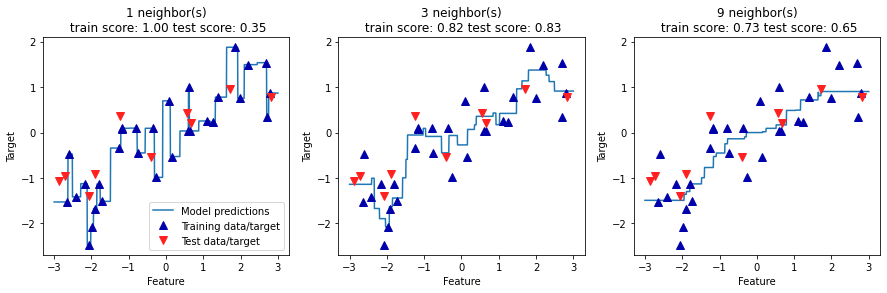

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

As we can see from the plot, using only a single neighbor, each point in the training
set has an obvious influence on the predictions, and the predicted values go through
all of the data points. This leads to a very unsteady prediction. Considering more
neighbors leads to smoother predictions, but these do not fit the training data as well.

##### Strengths, weaknesses, and parameters

Using this algorithm is a
good baseline method to try before considering more advanced techniques.

This approach often does not perform well on datasets with many features
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called sparse datasets).

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used
in practice, due to prediction being slow and its inability to handle many features.

#### Linear Models
##### Linear models for regression
\begin{align*}
\end{align*}

Start at 59

w[0]: 0.393906  b: -0.031804


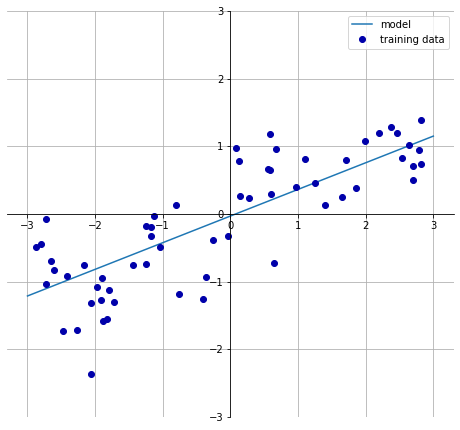

In [25]:
mglearn.plots.plot_linear_regression_wave()

#### Linear regression aka ordinary least squares

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [28]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


##### Ridge regression

Ridge regression is also a linear model for regression, so the formula it uses to make
predictions is the same one used for ordinary least squares. In ridge regression,
though, the coefficients (w) are chosen not only so that they predict well on the train‐
ing data, but also to fit an additional constraint.

Regularization means explic‐
itly restricting a model to avoid overfitting. The particular kind used by ridge regres‐
sion is known as L2 regularization.

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The Ridge model makes a trade-off between the simplicity of the model (near-zero
coefficients) and its performance on the training set. How much importance the
model places on simplicity versus training set performance can be specified by the
user, using the alpha parameter. In the previous example, we used the default param‐
eter alpha=1.0. There is no reason why this will give us the best trade-off, though.
The optimum setting of alpha depends on the particular dataset we are using.
Increasing alpha forces coefficients to move more toward zero, which decreases
training set performance but might help generalization. F

In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted, meaning we move right
in Figure 2-1. For very small values of alpha, coefficients are barely restricted at all,
and we end up with a model that resembles LinearRegression:

In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


A
higher alpha means a more restricted model, so we expect the entries of coef_ to
have smaller magnitude for a high value of alpha than for a low value of alpha.

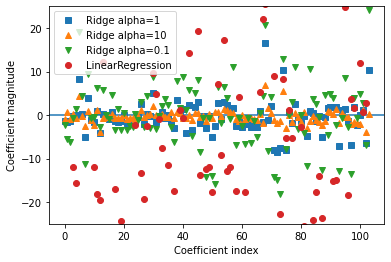

In [34]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

Another way to understand the influence of regularization is to fix a value of alpha
but vary the amount of training data available.

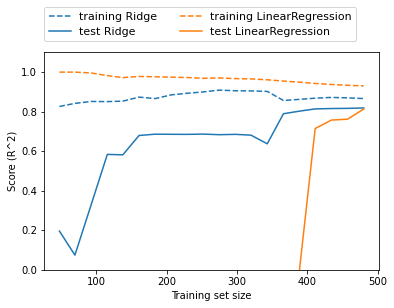

In [35]:
mglearn.plots.plot_ridge_n_samples()

The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance)

##### Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8
 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.

Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run):

In [37]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [38]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


A lower alpha allowed us to fit a more complex model, which worked better on the
training and test data. The performance is slightly better than using Ridge, and we are
using only 33 of the 105 features. This makes this model potentially easier to under‐
stand.

If we set alpha too low, however, we again remove the effect of regularization and end
up overfitting, with a result similar to LinearRegression:

Text(0, 0.5, 'Coefficient magnitude')

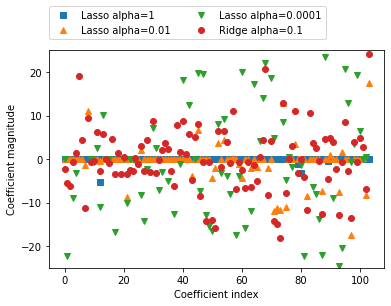

In [39]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For alpha=1, we not only see that most of the coefficients are zero (which we already
knew), but that the remaining coefficients are also small in magnitude. Decreasing
alpha to 0.01, we obtain the solution shown as the green dots, which causes most
features to be exactly zero. Using alpha=0.00001, we get a model that is quite unregu‐
larized, with most coefficients nonzero and of large magnitude. 

In practice, ridge regression is usually the first choice between these two models.
However, if you have a large amount of features and expect only a few of them to be
important, Lasso might be a better choice.

scikit-learn also provides
the ElasticNet class, which combines the penalties of Lasso and Ridge. In practice,
this combination works best, though at the price of having two parameters to adjust:
one for the L1 regularization, and one for the L2 regularization

##### Linear models for classification

The two most common linear classification algorithms are logistic regression, imple‐
mented in linear_model.LogisticRegression, and linear support vector machines
(linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classi‐
fier).

\begin{align*}
\end{align*}

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


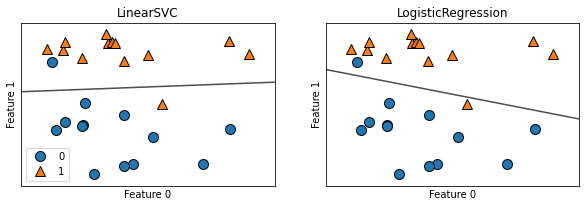

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

By default, both models apply an L2 regularization, in the same
way that Ridge does for regression.

For LogisticRegression and LinearSVC the trade-off parameter that determines the
strength of the regularization is called C, and higher values of C correspond to less regularization. In other words, when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero.

Using low values of C
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of C stresses the importance that each individual data point be classi‐
fied correctly. 

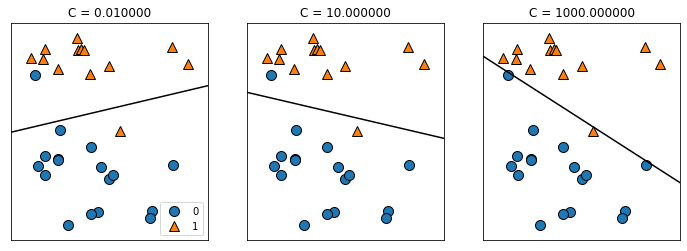

In [41]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization.
Most of the points in class 0 are at the top, and most of the points in class 1 are at the
bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐
sifying two points. In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. Finally, on the right‐
hand side, the very high value of C in the model tilts the decision boundary a lot, now
correctly classifying all points in class 0. One of the points in class 1 is still misclassi‐
fied, as it is not possible to correctly classify all points in this dataset using a straight
line. The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.946
Test set score: 0.965


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The default value of C=1 provides quite good performance, with 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible
model:

In [46]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.962
Test set score: 0.958


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Using C=100 results in higher training set accuracy, and also a slightly increased test
set accuracy, confirming our intuition that a more complex model should perform
better.
We can also investigate what happens if we use an even more regularized model than
the default of C=1, by setting C=0.01:

In [47]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


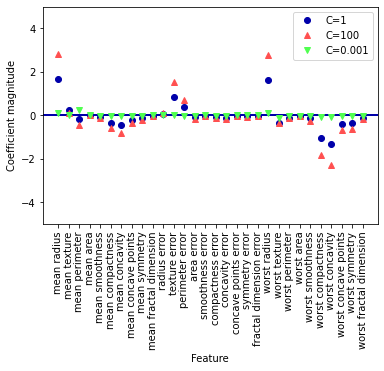

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

As LogisticRegression applies an L2 regularization by default,
the result looks similar to that produced by Ridge in Figure 2-12.
Stronger regularization pushes coefficients more and more toward
zero, though coefficients never become exactly zero. Inspecting the
plot more closely, we can also see an interesting effect in the third
coefficient, for “mean perimeter.” For C=100 and C=1, the coefficient
is negative, while for C=0.001, the coefficient is positive, with a
magnitude that is even larger than for C=1. Interpreting a model
like this, one might think the coefficient tells us which class a fea‐
ture is associated with. For example, one might think that a high
“texture error” feature is related to a sample being “malignant.”
However, the change of sign in the coefficient for “mean perimeter”
means that depending on which model we look at, a high “mean
perimeter” could be taken as being either indicative of “benign” or
indicative of “malignant.” This illustrates that interpretations of
coefficients of linear models should always be taken with a grain of
salt.

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features. Here is the coefficient plot and classifica‐
tion accuracies for L1 regularization

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


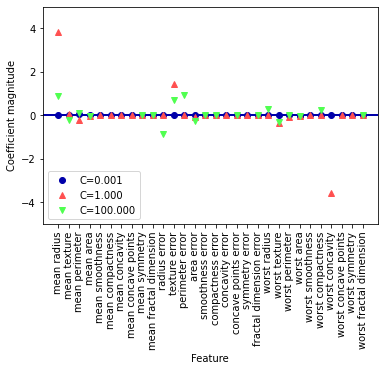

In [49]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

Many linear classification models are for binary classification only, and don’t extend
naturally to the multiclass case (with the exception of logistic regression). A common
technique to extend a binary classification algorithm to a multiclass classification
algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is
learned for each class that tries to separate that class from all of the other classes,
resulting in as many binary models as there are classes. To make a prediction, all
binary classifiers are run on a test point. The classifier that has the highest score on its
single class “wins,” and this class label is returned as the prediction.

Having one binary classifier per class results in having one vector of coefficients (w)
and one intercept (b) for each class.

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We
use a two-dimensional dataset, where each class is given by data sampled from a
Gaussian distribution

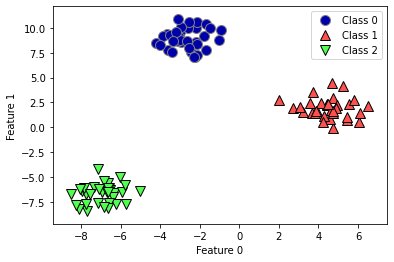

In [50]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [51]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ con‐
tains the coefficient vector for one of the three classes and each column holds the
coefficient value for a specific feature (there are two in this dataset). The intercept_
is now a one-dimensional array, storing the intercepts for each class.

Let’s visualize the lines given by the three binary classifiers 

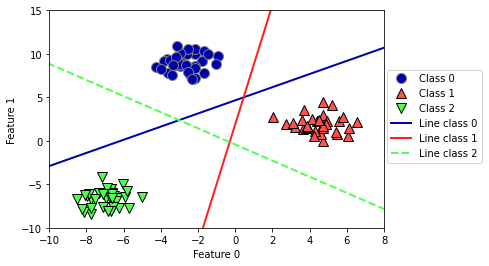

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

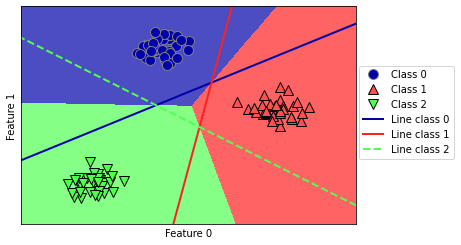

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

The main parameter of linear models is the regularization parameter, called alpha in
the regression models and C in LinearSVC and LogisticRegression. Large values for
alpha or small values for C mean simple models.

If you assume that only a few of your fea‐
tures are actually important, you should use L1. Otherwise, you should default to L2.

L1 can also be useful if interpretability of the model is important. As L1 will use only
a few features, it is easier to explain which features are important to the model, and
what the effects of these features are.

Linear models are very fast to train, and also fast to predict. They scale to very large
datasets and work well with sparse data. If your data consists of hundreds of thou‐
sands or millions of samples, you might want to investigate using the solver='sag'
option in LogisticRegression and Ridge, which can be faster than the default on
large datasets. Other options are the SGDClassifier class and the SGDRegressor
class, which implement even more scalable versions of the linear models described
here.

In [54]:
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [56]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Naive Bayes Classifiers

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear
models discussed in the previous section. However, they tend to be even faster in
training.

The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.

The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature.

There are three kinds of naive Bayes classifiers implemented in scikitlearn: GaussianNB, BernoulliNB, and MultinomialNB.
-  GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is, that each feature represents an integer count of some‐ thing, like how often a word appears in a sentence). 
- BernoulliNB and MultinomialNB are mostly used in text data classification.

The BernoulliNB classifier counts how often every feature of each class is not zero.
This is most easily understood with an example:

In [57]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Counting the nonzero entries per class in essence looks like this:

In [58]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB takes into account the
average value of each feature for each class, while GaussianNB stores the average value
as well as the standard deviation of each feature for each class.

#### Strengths, weaknesses and parameters

MultinomialNB and BernoulliNB have a single parameter, alpha, which controls
model complexity. The way alpha works is that the algorithm adds to the data alpha
many virtual data points that have positive values for all the features. This results in a
“smoothing” of the statistics. A large alpha means more smoothing, resulting in less
complex models. The algorithm’s performance is relatively robust to the setting of
alpha, meaning that setting alpha is not critical for good performance. However,
tuning it usually improves accuracy somewhat.

GaussianNB is mostly used on very high-dimensional data, while the other two var‐
iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB
usually performs better than BinaryNB, particularly on datasets with a relatively large
number of nonzero features (i.e., large documents).

Naive Bayes models are great baseline models and
are often used on very large datasets, where training even a linear model might take
too long.

### Decision trees

In [59]:
import sys
sys.path

['/Users/christian.conroy/OneDrive - Accenture Federal Services/Documents/Onboarding/Training Opps/Other training/muller_ml/introduction_to_ml_with_python',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/christian.conroy/.local/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/aeosa',
 '/Users/christian.conroy/Downloads/networkx',
 '/opt/anaconda3/lib/python3.7/site-packages/pytineye-2.0.1-py3.7.egg',
 '/opt/anaconda3/lib/python3.7/site-packages/urllib3-1.26.4-py3.7.egg',
 '/opt/anaconda3/lib/python3.7/site-packages/pycryptodome-3.10.1-py3.7-macosx-10.9-x86_64.egg',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/christian.conroy/.ipython']

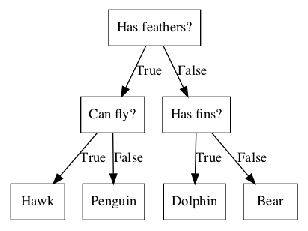

In [60]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

To build a tree, the algorithm searches over all possible tests and finds the one that is
most informative about the target variable.

The recursive partitioning of the data is repeated until each region in the partition
(each leaf in the decision tree) only contains a single target value (a single class or a
single regression value). A leaf of the tree that contains data points that all share the
same target value is called pure.

A prediction on a new data point is made by checking which region of the partition
of the feature space the point lies in, and then predicting the majority target (or the
single target in the case of pure leaves) in that region.

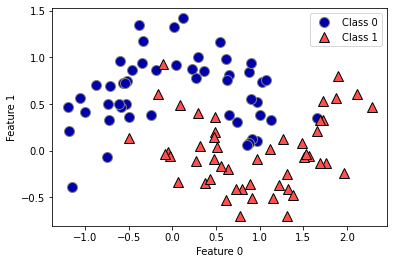

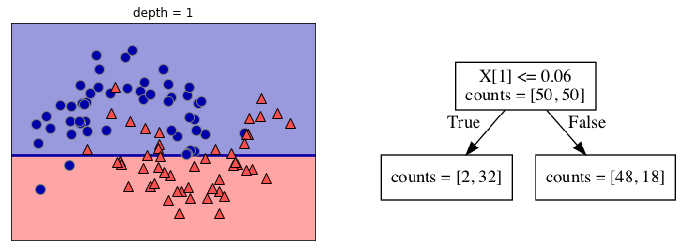

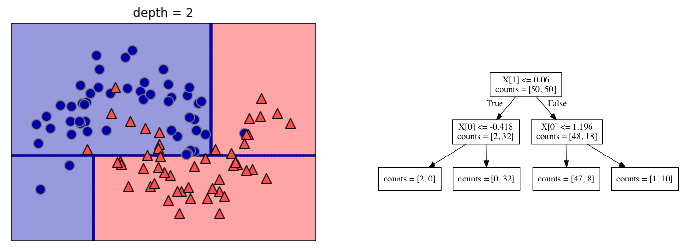

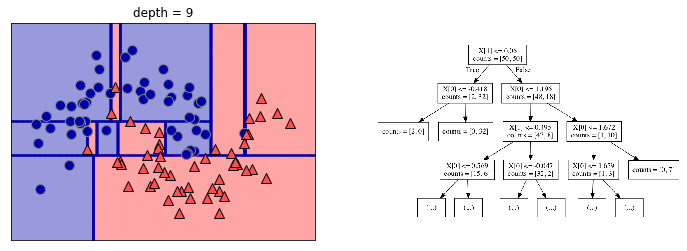

In [61]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

Typically, building a tree as described here and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class. 

There are two common strategies to prevent overfitting: stopping the creation of the
tree early (also called pre-pruning), or building the tree but then removing or collaps‐
ing nodes that contain little information (also called post-pruning or just pruning).
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

In [62]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Now let’s apply pre-pruning to the tree, which will stop developing
the tree before we perfectly fit to the training data. One option is to stop building the
tree after a certain depth has been reached. Here we set max_depth=4, meaning only
four consecutive questions can be asked (cf. Figures 2-24 and 2-26). Limiting the
depth of the tree decreases overfitting. This leads to a lower accuracy on the training
set, but an improvement on the test set:

In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

In [64]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

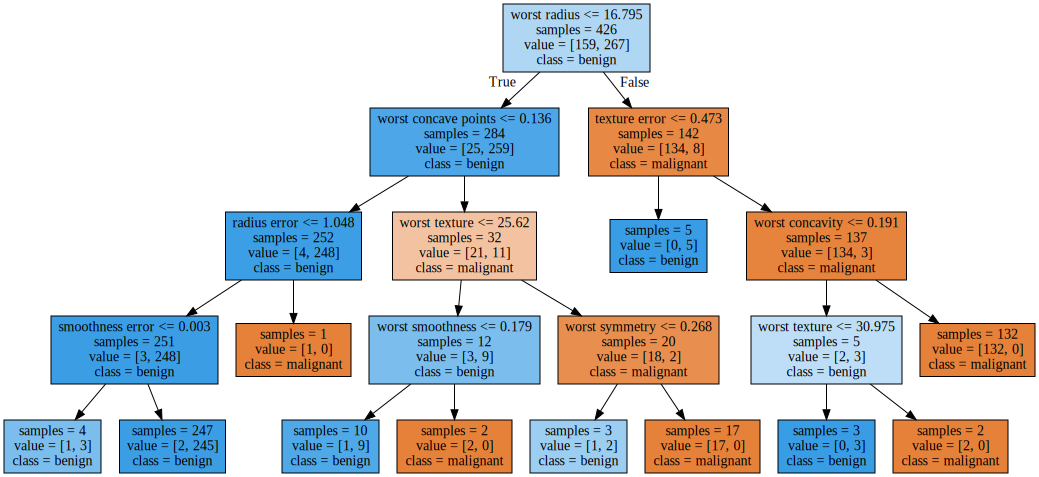

In [65]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

 One method of inspecting the tree that may be helpful
is to find out which path most of the data actually takes. The n_samples shown in
each node in Figure 2-27 gives the number of samples in that node, while value pro‐
vides the number of samples per class. Following the branches to the right, we see
that worst radius <= 16.795 creates a node that contains only 8 benign but 134
malignant samples. The rest of this side of the tree then uses some finer distinctions
to split off these 8 remaining benign samples. Of the 142 samples that went to the
right in the initial split, nearly all of them (132) end up in the leaf to the very right.

#### Feature Importance in trees

In [66]:
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


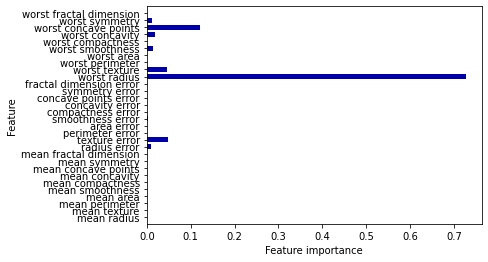

In [67]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.

However, if a feature has a low feature_importance, it doesn’t mean that this feature
is uninformative. It only means that the feature was not picked by the tree, likely
because another feature encodes the same information.

The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant.

Feature importances: [0. 1.]


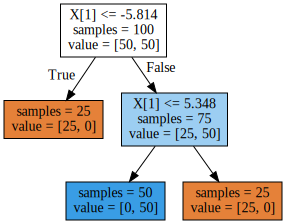

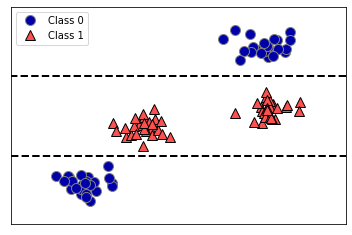

In [68]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

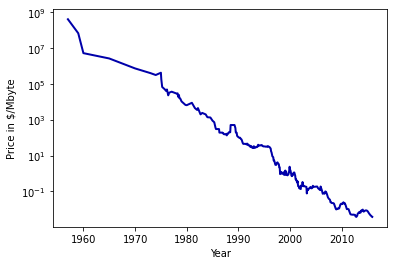

In [69]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

We rescale the prices using a loga‐
rithm, so that the relationship is relatively linear. This doesn’t make a difference for
the DecisionTreeRegressor, but it makes a big difference for LinearRegression (we
will discuss this in more depth in Chapter 4).

After training the models and making
predictions, we apply the exponential map to undo the logarithm transform.

In [70]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  from ipykernel import kernelapp as app


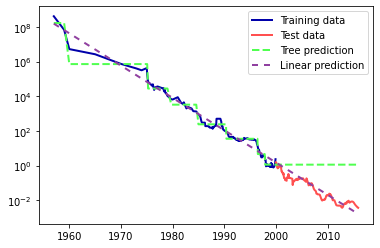

In [71]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The tree model, on the other hand, makes perfect
predictions on the training data; we did not restrict the complexity of the tree, so it
learned the whole dataset by heart.

However, once we leave the data range for which
the model has data, the model simply keeps predicting the last known point. The tree
has no ability to generate “new” responses, outside of what was seen in the training
data. This shortcoming applies to all models based on trees.

#### Strengths, weaknesses and parameters

As each feature is processed separately, and the possible splits of the data don’t
depend on scaling, no preprocessing like normalization or standardization of features
is needed for decision tree algorithms. In particular, decision trees work well when
you have features that are on completely different scales, or a mix of binary and con‐
tinuous features.

The main downside of decision trees is that even with the use of pre-pruning, they
tend to overfit and provide poor generalization performance.

#### Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

A random forest
is essentially a collection of decision trees, where each tree is slightly different from
the others. The idea behind random forests is that each tree might do a relatively
good job of predicting, but will likely overfit on part of the data. If we build many
trees, all of which work well and overfit in different ways, we can reduce the amount
of overfitting by averaging their results. This reduction in overfitting, while retaining
the predictive power of the trees, can be shown using rigorous mathematics.

To build a random forest model, you need to decide on the
number of trees to build (the n_estimators parameter of RandomForestRegressor or
RandomForestClassifier). Let’s say we want to build 10 trees. These trees will be
built completely independently from each other, and the algorithm will make differ‐
ent random choices for each tree to make sure the trees are distinct. 

To build a tree,
we first take what is called a bootstrap sample of our data. That is, from our n_samples
data points, we repeatedly draw an example randomly with replacement (meaning the
same sample can be picked multiple times), n_samples times.

 Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and it looks for the best possible test involving one of these features. The
number of features that are selected is controlled by the max_features parameter.
This selection of a subset of features is repeated separately in each node, so that each
node in a tree can make a decision using a different subset of the features.

If we set max_features to n_fea
tures, that means that each split can look at all features in the dataset, and no ran‐
domness will be injected in the feature selection (the randomness due to the
bootstrapping remains, though). If we set max_features to 1, that means that the
splits have no choice at all on which feature to test, and can only search over different
thresholds for the feature that was selected randomly. Therefore, a high max_fea
tures means that the trees in the random forest will be quite similar, and they will be
able to fit the data easily, using the most distinctive features. A low max_features
means that the trees in the random forest will be quite different, and that each tree
might need to be very deep in order to fit the data well.

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

The trees that are built as part of the random forest are stored in the estimator_
attribute. Let’s visualize the decision boundaries learned by each tree, together with
their aggregate prediction as made by the forest

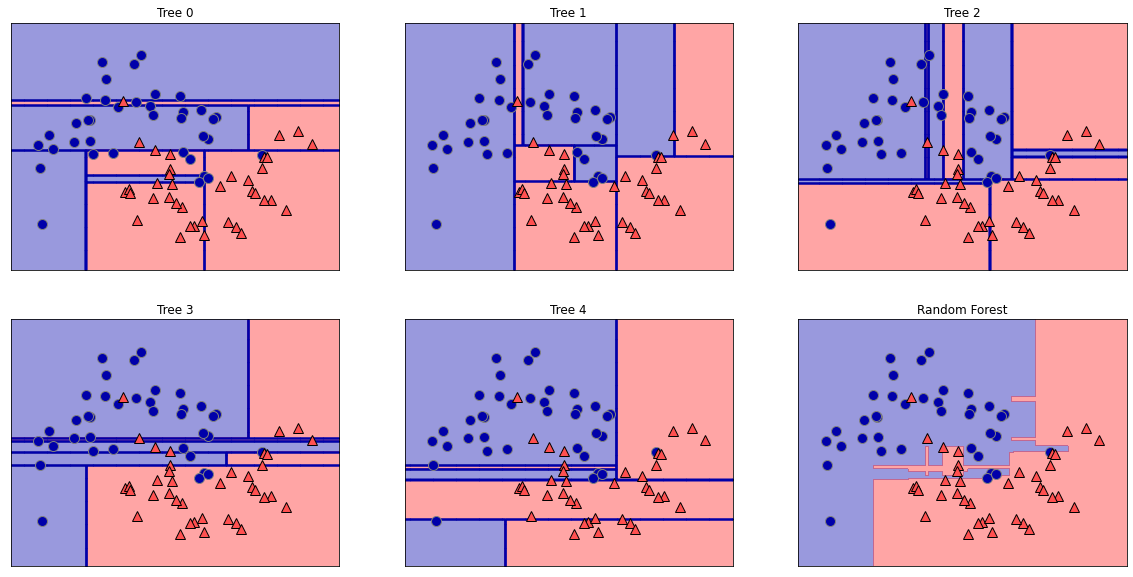

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Similarly to the decision tree, the random forest provides feature importances, which
are computed by aggregating the feature importances over the trees in the forest. Typ‐
ically, the feature importances provided by the random forest are more reliable than
the ones provided by a single tree.

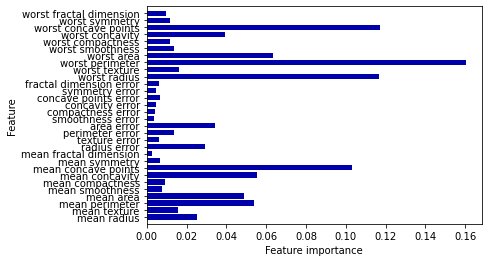

In [77]:
plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

One reason to still use decision trees is if you need a
compact representation of the decision-making process. It is basically impossible to
interpret tens or hundreds of trees in detail, and trees in random forests tend to be
deeper than decision trees (because of the use of feature subsets). Therefore, if you
need to summarize the prediction making in a visual way to nonexperts, a single
decision tree might be a better choice. 

 If you are using a multi-core processor (as nearly all
modern computers do), you can use the n_jobs parameter to adjust the number of
cores to use. Using more CPU cores will result in linear speed-ups (using two cores,
the training of the random forest will be twice as fast), but specifying n_jobs larger
than the number of cores will not help. 

You can set n_jobs=-1 to use all the cores in
your computer.

Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear mod‐
els. If time and memory are important in an application, it might make sense to use a
linear model instead.

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In contrast to the
random forest approach, gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used.

Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate, which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators, also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [79]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [80]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


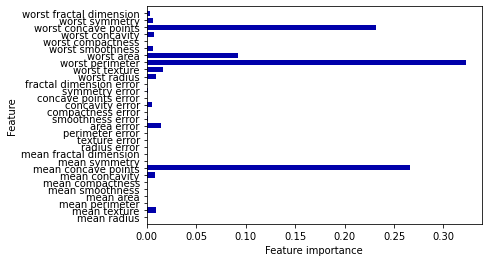

In [81]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters

As both gradient boosting and random forests perform well on similar kinds of data,
a common approach is to first try random forests, which work quite robustly. If ran‐
dom forests work well but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, mov‐
ing to gradient boosting often helps.

If you want to apply gradient boosting to a large-scale problem, it might be worth
looking into the xgboost package and its Python interface, which at the time of writ‐
ing is faster (and sometimes easier to tune) than the scikit-learn implementation of
gradient boosting on many datasets.

Gradient boosted decision trees are among the
most powerful and widely used models for supervised learning. Their main drawback
is that they require careful tuning of the parameters and may take a long time to
train.

Similarly to other tree-based models, the algorithm works well without scaling
and on a mixture of binary and continuous features.

The main parameters of gradient boosted tree models are the number of trees, n_esti
mators, and the learning_rate, which controls the degree to which each tree is
allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build
a model of similar complexity.

In contrast to random forests, where a higher n_esti
mators value is always better, increasing n_estimators in gradient boosting leads to a
more complex model, which may lead to overfitting. A common practice is to fit
n_estimators depending on the time and memory budget, and then search over dif‐
ferent learning_rates.

Another important parameter is max_depth (or alternatively max_leaf_nodes), to
reduce the complexity of each tree. Usually max_depth is set very low for gradient
boosted models, often not deeper than five splits.

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

Text(0, 0.5, 'Feature 1')

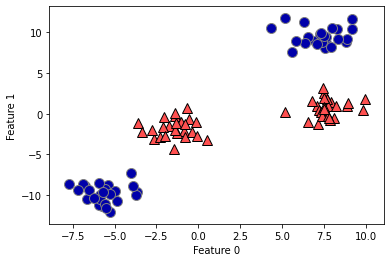

In [82]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

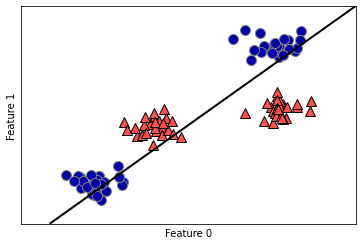

In [83]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2, the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point, (feature0, feature1), we now represent it as a threedimensional point, (feature0, feature1, feature1 ** 2).

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


Text(0.5, 0, 'feature1 ** 2')

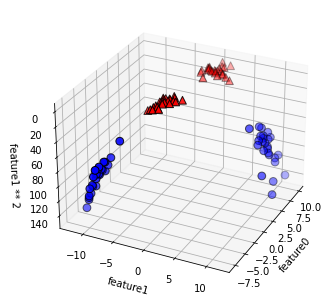

In [84]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


Text(0.5, 0, 'feature1 ** 2')

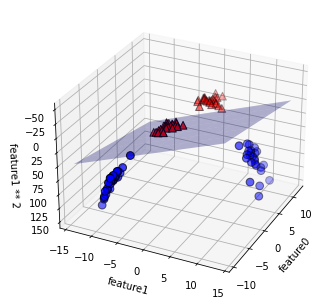

In [85]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear any‐
more. It is not a line, but more of an ellipse, as you can see from the plot created here

Text(0, 0.5, 'Feature 1')

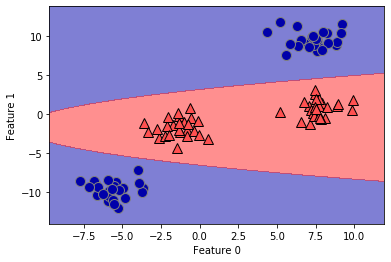

In [81]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
#### Understanding SVMs
\begin{align*}
\end{align*}

However, often we don’t know which fea‐
tures to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation very expensive. Luckily, there is
a clever mathematical trick that allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation. This is
known as the kernel trick, and it works by directly computing the distance (more pre‐
cisely, the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.

There are two ways to map your data into a higher-dimensional space that are com‐
monly used with support vector machines: the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5); and the radial basis function (RBF) kernel, also known as the
Gaussian kernel. The Gaussian kernel is a bit harder to explain, as it corresponds to
an infinite-dimensional feature space. One way to explain the Gaussian kernel is that it considers all possible polynomials of all degrees, but the importance of the features
decreases for higher degrees.

To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vec‐
tor, and the importance of the support vectors that was learned during training
(stored in the dual_coef_ attribute of SVC).

Text(0, 0.5, 'Feature 1')

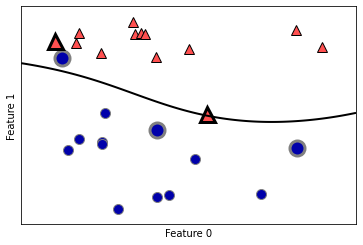

In [86]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

The gamma parameter is the one shown in the formula given in the previous section,
which controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together. The C parameter is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_).

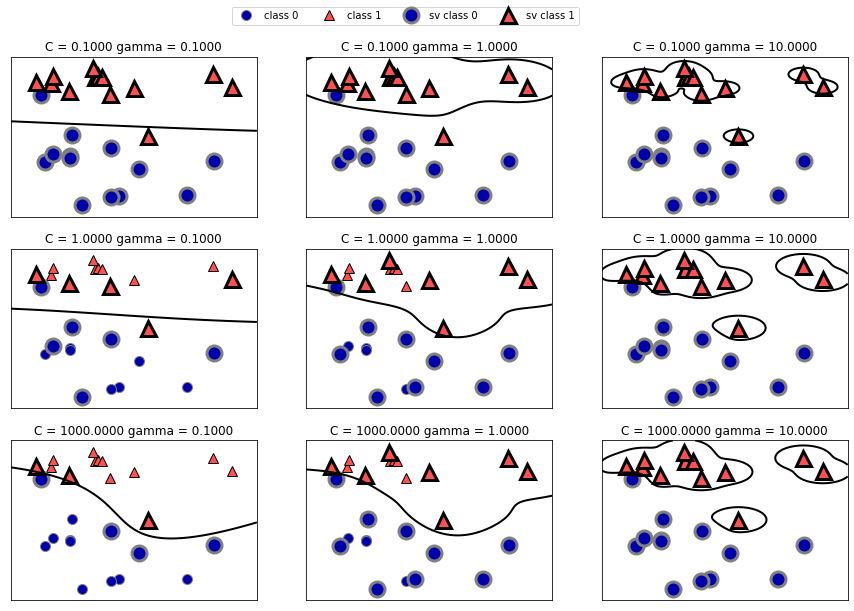

In [87]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10.
A small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.

Going from top to bottom, we increase the C parameter from 0.1 to 1000. As with the
linear models, a small C means a very restricted model, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C, as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.90
Accuracy on test set: 0.94


Let’s look at the mini‐
mum and maximum values for each feature, plotted in log-space

Text(0, 0.5, 'Feature magnitude')

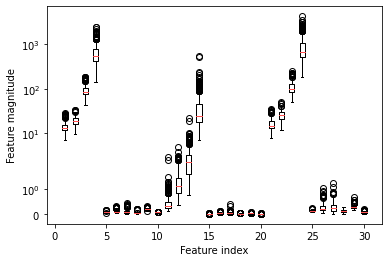

In [89]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

From this plot we can determine that features in the Breast Cancer dataset are of
completely different orders of magnitude. This can be somewhat of a problem for
other models (like linear models), but it has devastating effects for the kernel SVM.

##### Preprocessing data for SVMs

One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale. A common rescaling method for kernel SVMs is to
scale the data such that all features are between 0 and 1. We will see how to do this
using the MinMaxScaler preprocessing method in Chapter 3, where we’ll give more
details. For now, let’s do this “by hand”:

In [90]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

Minimum for each feature
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [91]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [92]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.972


Here, increasing C allows us to improve the model significantly, resulting in 97.2%
accuracy.

In [93]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


#### Strengths, weaknesses and parameters

Another downside of SVMs is that they require careful preprocessing of the data and
tuning of the parameters. This is why, these days, most people instead use tree-based
models such as random forests or gradient boosting (which require little or no pre‐
processing) in many applications. Furthermore, SVM models are hard to inspect; it
can be difficult to understand why a particular prediction was made, and it might be
tricky to explain the model to a nonexpert.

### Neural Networks (Deep Learning)
#### The Neural Network Model

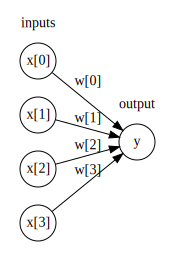

In [94]:
display(mglearn.plots.plot_logistic_regression_graph())

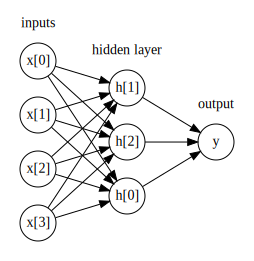

In [95]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

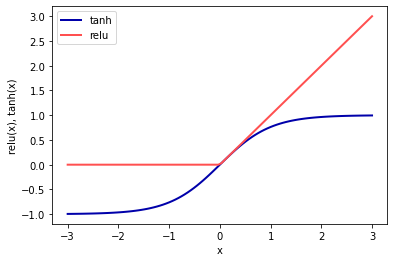

In [97]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

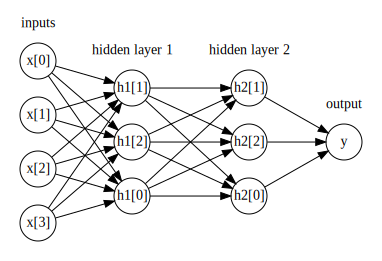

In [98]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks

Text(0, 0.5, 'Feature 1')

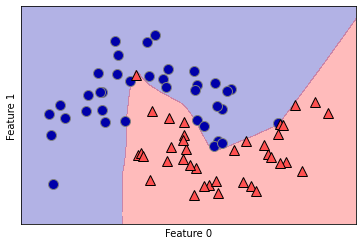

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

By default, the MLP uses 100 hidden nodes, which is quite a lot for this small dataset.
We can reduce the number (which reduces the complexity of the model) and still get
a good result 

Text(0, 0.5, 'Feature 1')

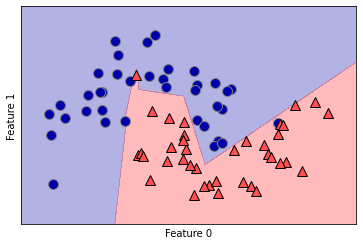

In [100]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

With only 10 hidden units, the decision boundary looks somewhat more ragged. The
default nonlinearity is relu, shown in Figure 2-46. With a single hidden layer, this
means the decision function will be made up of 10 straight line segments. If we want
a smoother decision boundary, we could add more hidden units (as in Figure 2-49),
add a second hidden layer (Figure 2-50), or use the tanh nonlinearity (Figure 2-51):

Text(0, 0.5, 'Feature 1')

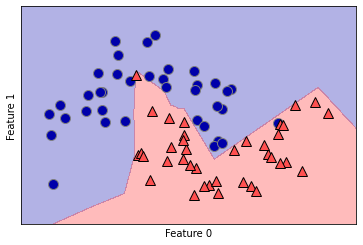

In [101]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

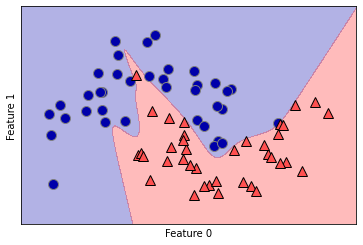

In [102]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Finally, we can also control the complexity of a neural network by using an l2 penalty
to shrink the weights toward zero, as we did in ridge regression and the linear classifi‐
ers. The parameter for this in the MLPClassifier is alpha (as in the linear regression
models), and it’s set to a very low value (little regularization) by default

/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


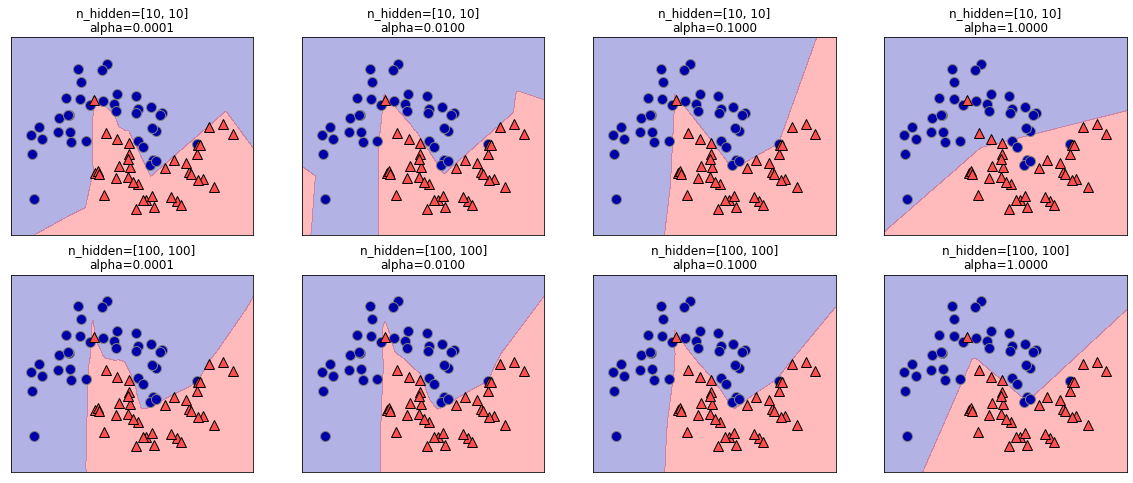

In [103]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

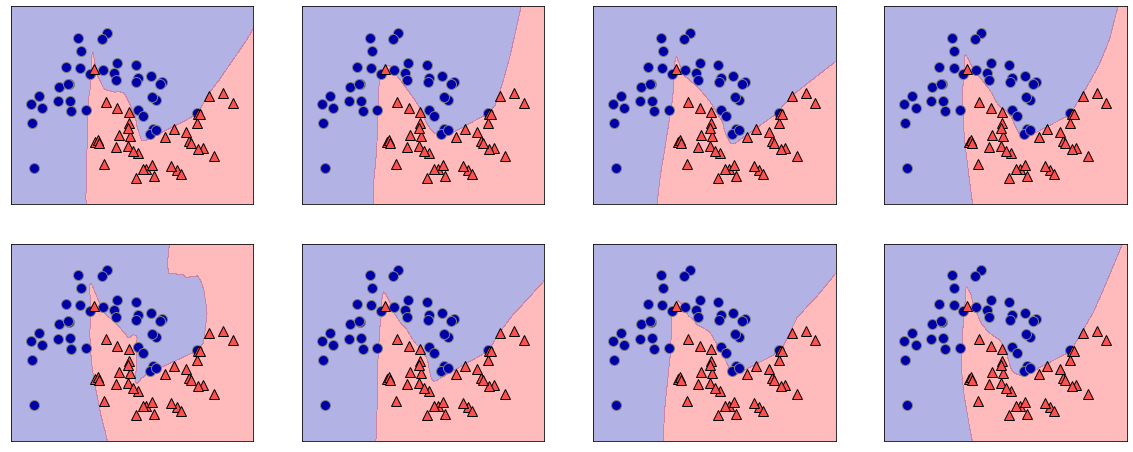

In [104]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [105]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


We must rescale our data so that it fulfills these requirements. A

In [107]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


The results are much better after scaling, and already quite competitive. We got a
warning from the model, though, that tells us that the maximum number of iterations
has been reached. This is part of the adam algorithm for learning the model, and tells
us that we should increase the number of iterations:

In [108]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


As there is
some gap between the training and the test performance, we might try to decrease the
model’s complexity to get better generalization performance. Here, we choose to
increase the alpha parameter (quite aggressively, from 0.0001 to 1) to add stronger
regularization of the weights:

In [109]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


One way to introspect
what was learned is to look at the weights in the model. You can see an example of
this in the scikit-learn example gallery. For the Breast Cancer dataset, this might
be a bit hard to understand. The following plot (Figure 2-54) shows the weights that
were learned connecting the input to the first hidden layer. The rows in this plot cor‐
respond to the 30 input features, while the columns correspond to the 100 hidden
units. Light colors represent large positive values, while dark colors represent nega‐
tive values:

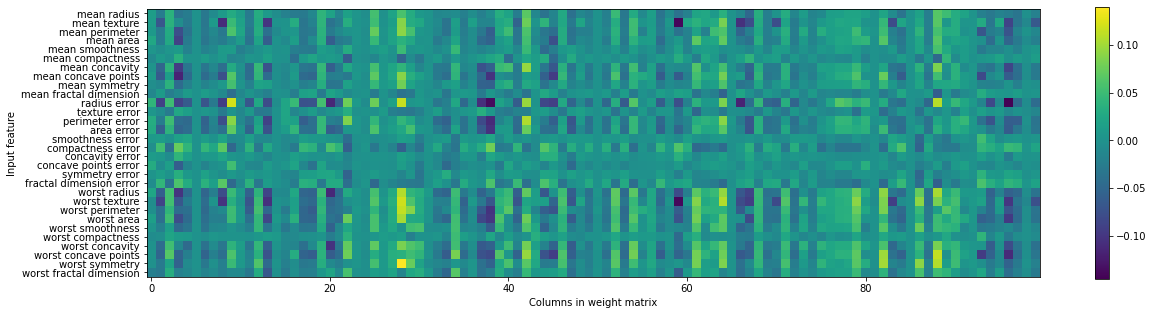

In [110]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

One possible inference we can make is that features that have very small weights for
all of the hidden units are “less important” to the model. We can see that “mean
smoothness” and “mean compactness,” in addition to the features found between
“smoothness error” and “fractal dimension error,” have relatively low weights com‐
pared to other features. This could mean that these are less important features or pos‐
sibly that we didn’t represent them in a way that the neural network could use.

#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

The most important parameters are the num‐
ber of layers and the number of hidden units per layer. You should start with one or
two hidden layers, and possibly expand from there. The number of nodes per hidden
layer is often similar to the number of input features, but rarely higher than in the low
to mid-thousands.

A common way to adjust parameters in a neural network is to first create a network
that is large enough to overfit, making sure that the task can actually be learned by
the network. Then, once you know the training data can be learned, either shrink the
network or increase alpha to add regularization, which will improve generalization
performance.

### Uncertainty estimates from classifiers

There are two different functions in scikit-learn that can be used to obtain uncer‐
tainty estimates from classifiers: decision_function and predict_proba. 

Let’s look
at what these two functions do on a synthetic two-dimensional dataset, when build‐
ing a GradientBoostingClassifier classifier, which has both a decision_function
and a predict_proba method:

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

#### The Decision Function

In the binary classification case, the return value of decision_function is of shape
(n_samples,), and it returns one floating-point number for each sample:

In [107]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


This value encodes how strongly the model believes a data point to belong to the
“positive” class, in this case class 1. Positive values indicate a preference for the posi‐
tive class, and negative values indicate a preference for the “negative” (other) class:

In [112]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [113]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


For binary classification, the “negative” class is always the first entry of the classes_
attribute, and the “positive” class is the second entry of classes_. So if you want to
fully recover the output of predict, you need to make use of the classes_ attribute:

In [114]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [115]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


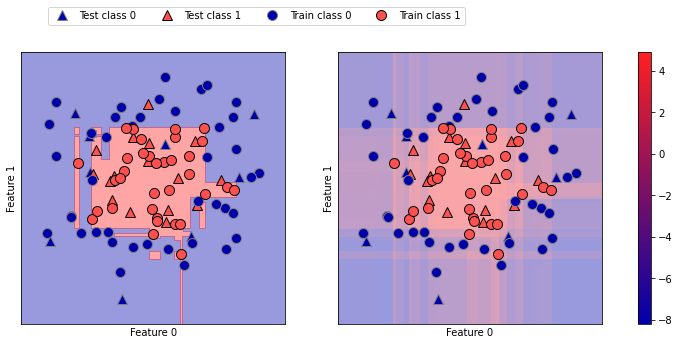

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Predicting Probabilities

The output of predict_proba is a probability for each class, and is often more easily
understood than the output of decision_function. It is always of shape (n_samples,
2) for binary classification:

In [117]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


The first entry in each row is the estimated probability of the first class, and the sec‐
ond entry is the estimated probability of the second class. Because it is a probability,
the output of predict_proba is always between 0 and 1, and the sum of the entries
for both classes is always 1:

In [119]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


Because the probabilities for the two classes sum to 1, exactly one of the classes will
be above 50% certainty. That class is the one that is predicted.

In the following example (Figure 2-56) we again show the decision boundary on the
dataset, next to the class probabilities for the class 1

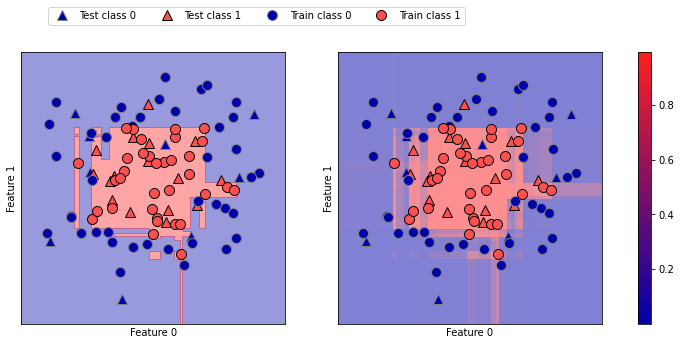

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### Uncertainty in multiclass classification

So far, we’ve only talked about uncertainty estimates in binary classification. But the
decision_function and predict_proba methods also work in the multiclass setting.
Let’s apply them on the Iris dataset, which is a three-class classification dataset:

In [121]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [122]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
[[-1.996  0.048 -1.927]
 [ 0.061 -1.908 -1.928]
 [-1.991 -1.876  0.097]
 [-1.996  0.048 -1.927]
 [-1.997 -0.135 -1.203]
 [ 0.061 -1.908 -1.928]]


In the multiclass case, the decision_function has the shape (n_samples,
n_classes) and each column provides a “certainty score” for each class, where a large
score means that a class is more likely and a small score means the class is less likely.

In [123]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


The output of predict_proba has the same shape, (n_samples, n_classes). Again,
the probabilities for the possible classes for each data point sum to 1:

In [124]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
[[0.102 0.788 0.109]
 [0.783 0.109 0.107]
 [0.098 0.11  0.792]
 [0.102 0.788 0.109]
 [0.104 0.667 0.229]
 [0.783 0.109 0.107]]
Sums: [1. 1. 1. 1. 1. 1.]


We can again recover the predictions by computing the argmax of predict_proba:

In [125]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [126]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### Summary and Outlook

When working with a new dataset, it is in general a good idea to start with a simple
model, such as a linear model or a naive Bayes or nearest neighbors classifier, and see
how far you can get. After understanding more about the data, you can consider
moving to an algorithm that can build more complex models, such as random forests,
gradient boosted decision trees, SVMs, or neural networks.